# K-means Clustering and Principal component analysis (PCA) on Country Data
## Factors of Child mortality

For this project I used the Country-data from kaggle:

https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

In [1]:
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("Country-data.csv")
df 

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [3]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


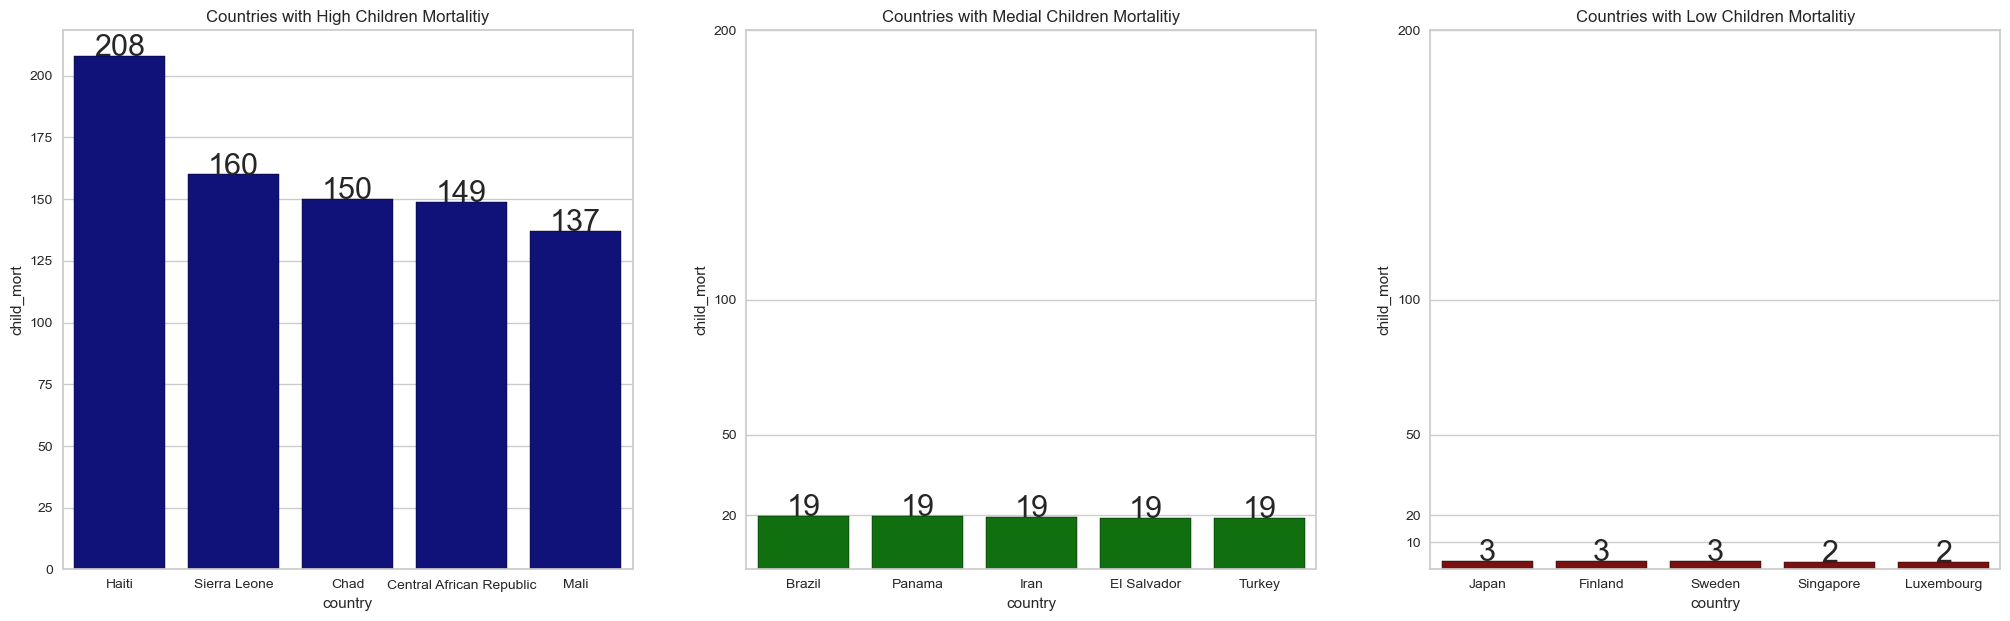

In [82]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

# first plot with countries from "Low" cluster
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'child_mort', data = df.sort_values(ascending = False,
                by = 'child_mort').iloc[:5],edgecolor = 'black', color="darkblue")
plt.title('Countries with High Children Mortalitiy')
ax.set_yscale("linear")
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 22)

# first plot with countries from "Mid" cluster
plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'child_mort', data = df.sort_values(ascending = False,
                        by = 'child_mort').iloc[81:86],edgecolor = 'black', color="green")
ax.set_yscale("linear")
ticks = [20, 50, 100, 200]
ax.set_yticks(ticks)
ax.set_yticklabels(ticks) 
plt.title('Countries with Medial Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 22)

# first plot with countries from "High" cluster
plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'child_mort', data = df.sort_values(ascending = False,
                by = 'child_mort').iloc[161:166],edgecolor = 'black', color="darkred")
ax.set_yscale("linear")
ticks = [10,20, 50, 100, 200]
ax.set_yticks(ticks)
ax.set_yticklabels(ticks) 
plt.title('Countries with Low Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 22) 
plt.show()

In [5]:
X = df.select_dtypes('number').copy() 
X.head() 

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

In [6]:
scaler = StandardScaler()
decomp = PCA()
pipe = make_pipeline(scaler, decomp)
pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

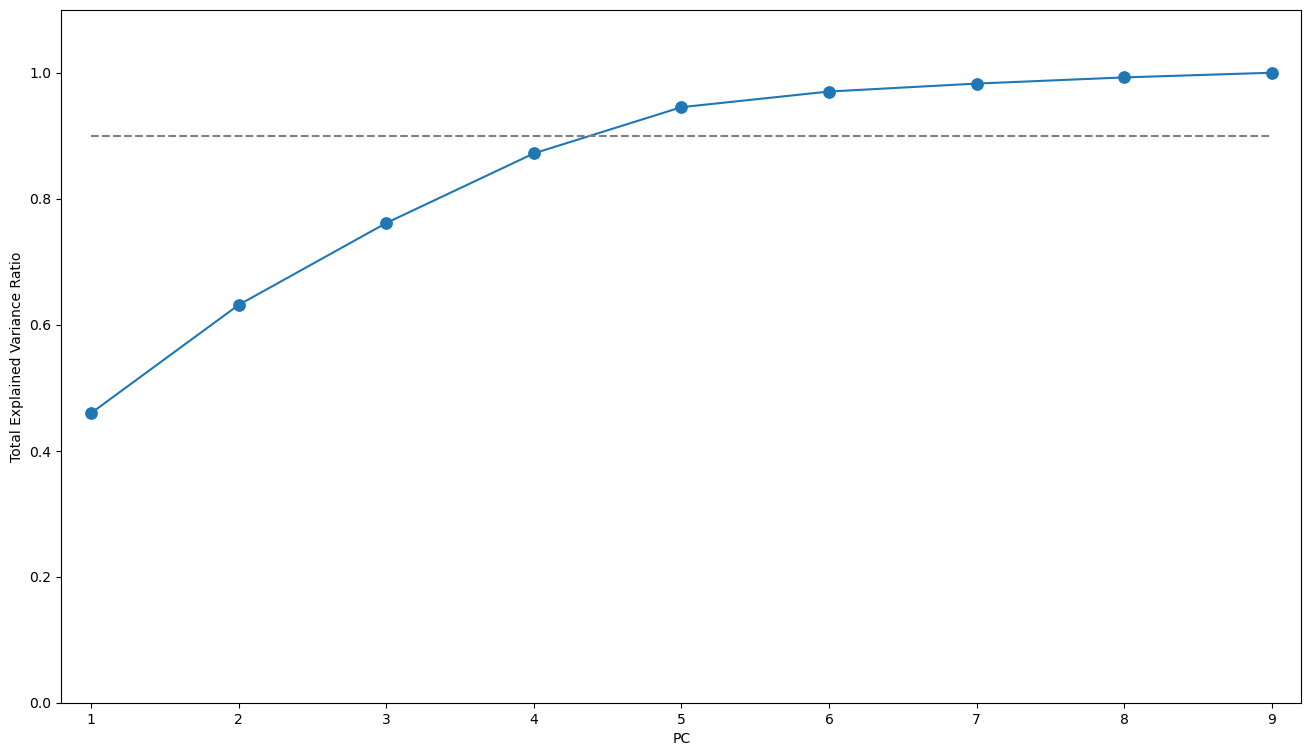

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# using the cumulative sum 
explained_variance = pipe['pca'].explained_variance_ratio_.cumsum()
index = [i+1 for i in range(len(explained_variance))]

fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x=index, y=explained_variance)
sns.scatterplot(x=index, y=explained_variance, s=100)
plt.xlim((1-0.2, len(explained_variance)+0.2))
plt.ylim((0, 1.1))
x_s, x_e = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(x_s+0.2, x_e))
ax.hlines(y=0.9, xmin=1, xmax=len(explained_variance), color='gray', linestyle='--')
plt.ylabel('Total Explained Variance Ratio')
plt.xlabel('PC')
plt.show()

In [8]:
scaler = StandardScaler()
decomp = PCA(n_components=0.9)
pipe = make_pipeline(scaler, decomp)

pipe.fit(X)
# 5 PC => but since 2 PC have very few data we will use 3 clusters

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9))])

In [43]:
# How much of the variance is explained by PC1
pipe['pca'].explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211])

In [10]:
scaler = StandardScaler()
decomp = PCA(n_components=0.9)
cluster = KMeans()
pipe = make_pipeline(scaler, decomp, cluster)

pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)), ('kmeans', KMeans())])

In [11]:
from yellowbrick.cluster import KElbowVisualizer 

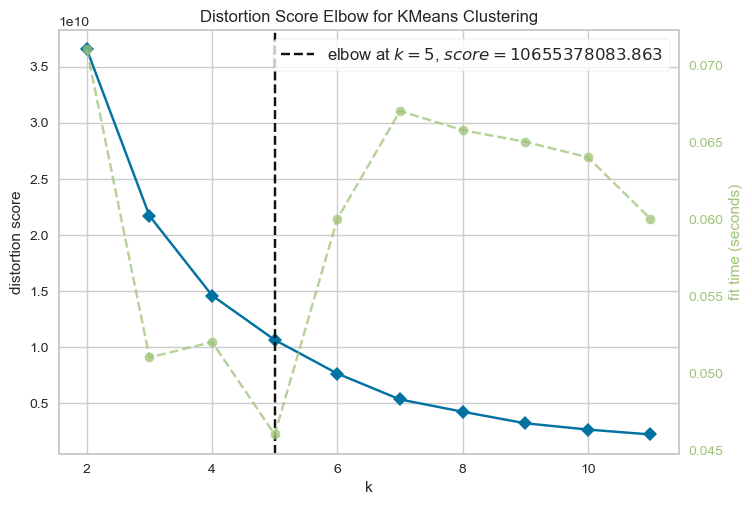

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
visualizer = KElbowVisualizer(pipe['kmeans'], k=(2,12))

visualizer.fit(X)
visualizer.show()

In [13]:
scaler = StandardScaler()
decomp = PCA(n_components=0.9)
cluster = KMeans(3)
pipe = make_pipeline(scaler, decomp, cluster)

pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kmeans', KMeans(n_clusters=3))])

In [14]:
values = pipe[:2].transform(X)
pca_labels = [f'PC{idx+1}' for idx, i in enumerate(values.T)]
df = df.join(pd.DataFrame(values, columns=pca_labels))
df['clusters'] = pipe['kmeans'].labels_

In [15]:
# Renaming the clusters
df['clusters'].replace([0, 1, 2], ['Low', 'High', 'Mid'], inplace=True) 
df.clusters.unique()  


array(['Mid', 'Low', 'High'], dtype=object)

In [16]:
# Make sure to save your data to avoid new clusters creation while rerunning 
#df.to_csv("df", index=False)

In [17]:
# read a df you saved
df = pd.read_csv("df") 

In [18]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'PC1', 'PC2', 'PC3',
       'PC4', 'PC5', 'clusters'],
      dtype='object')

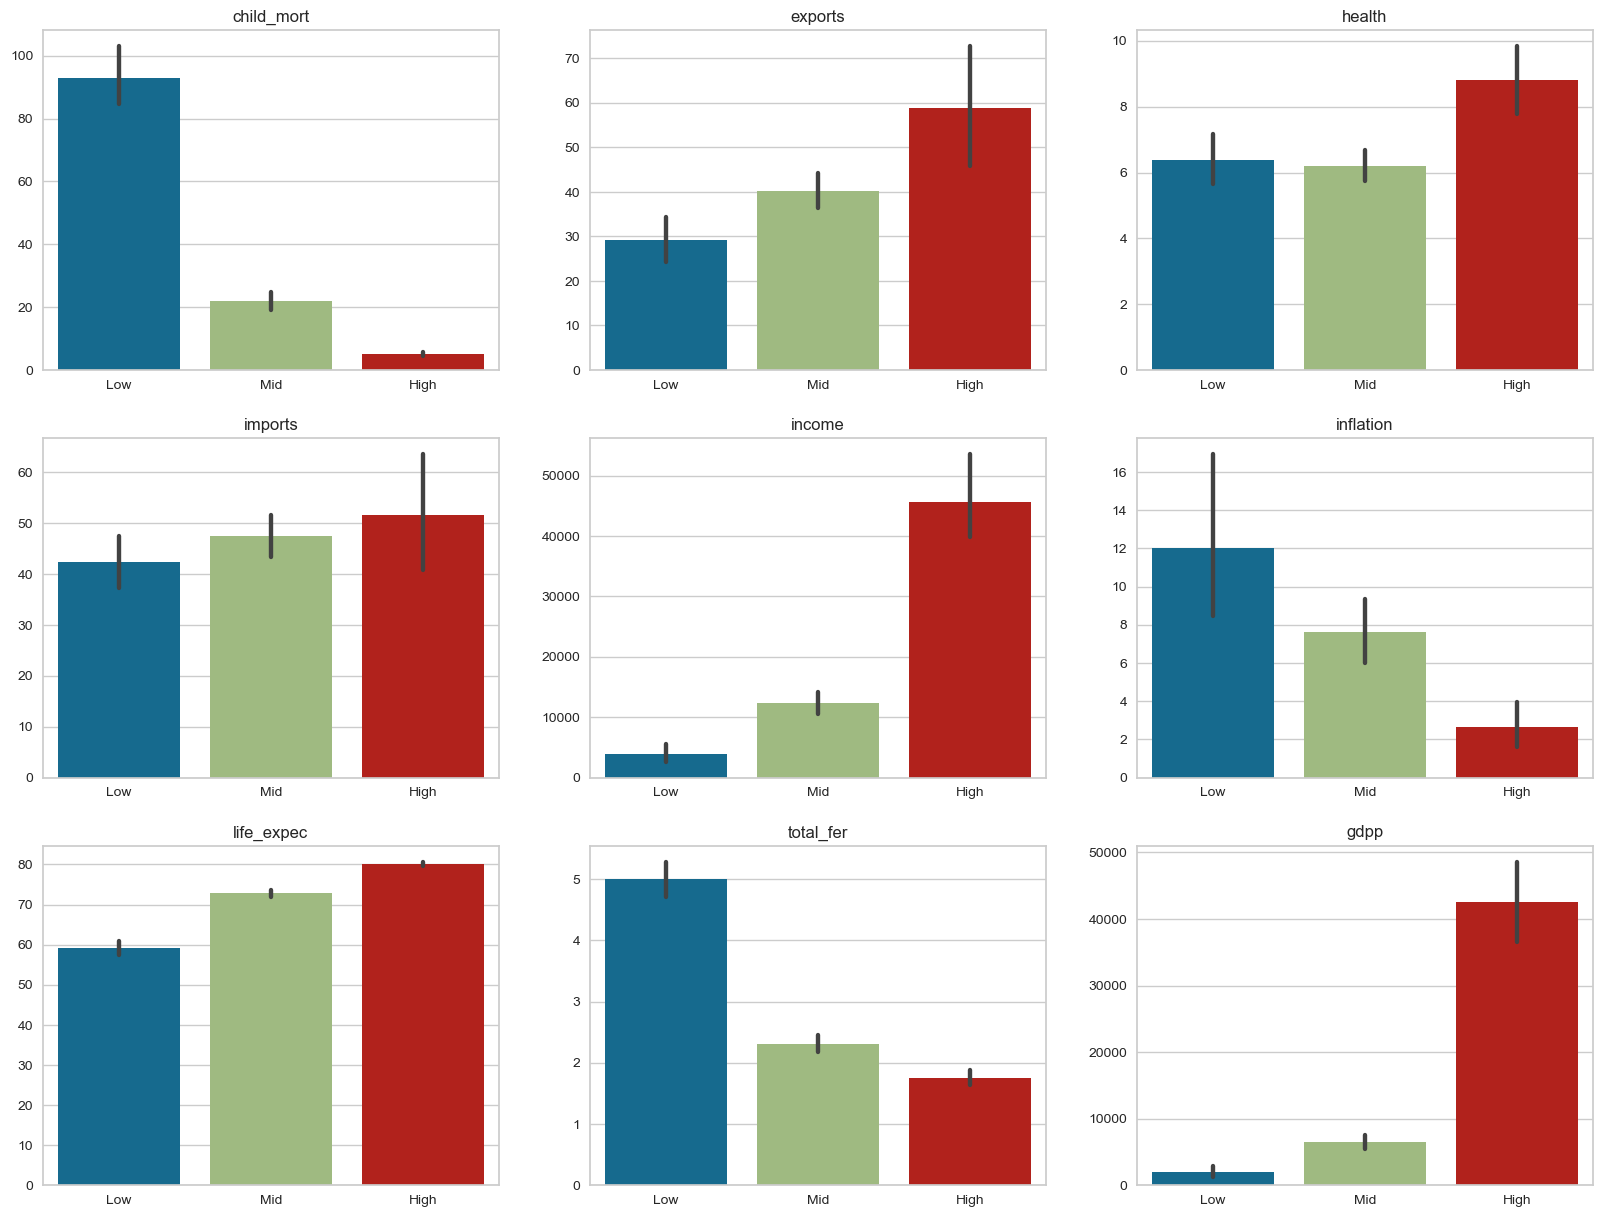

In [19]:
import math

var_list = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

rows = math.ceil(len(var_list)/3)

fig, axs = plt.subplots(rows, 3, figsize=(20,5*rows))

for i, ax in zip(var_list, axs.flat):
    g = sns.barplot(data=df, x="clusters", y=i, ax=ax)
    ax.set(xlabel="", ylabel="", title=i)
    
for i in axs.flat[::-1][:rows*3-len(var_list)]:
    i.set_axis_off()
    
plt.show()

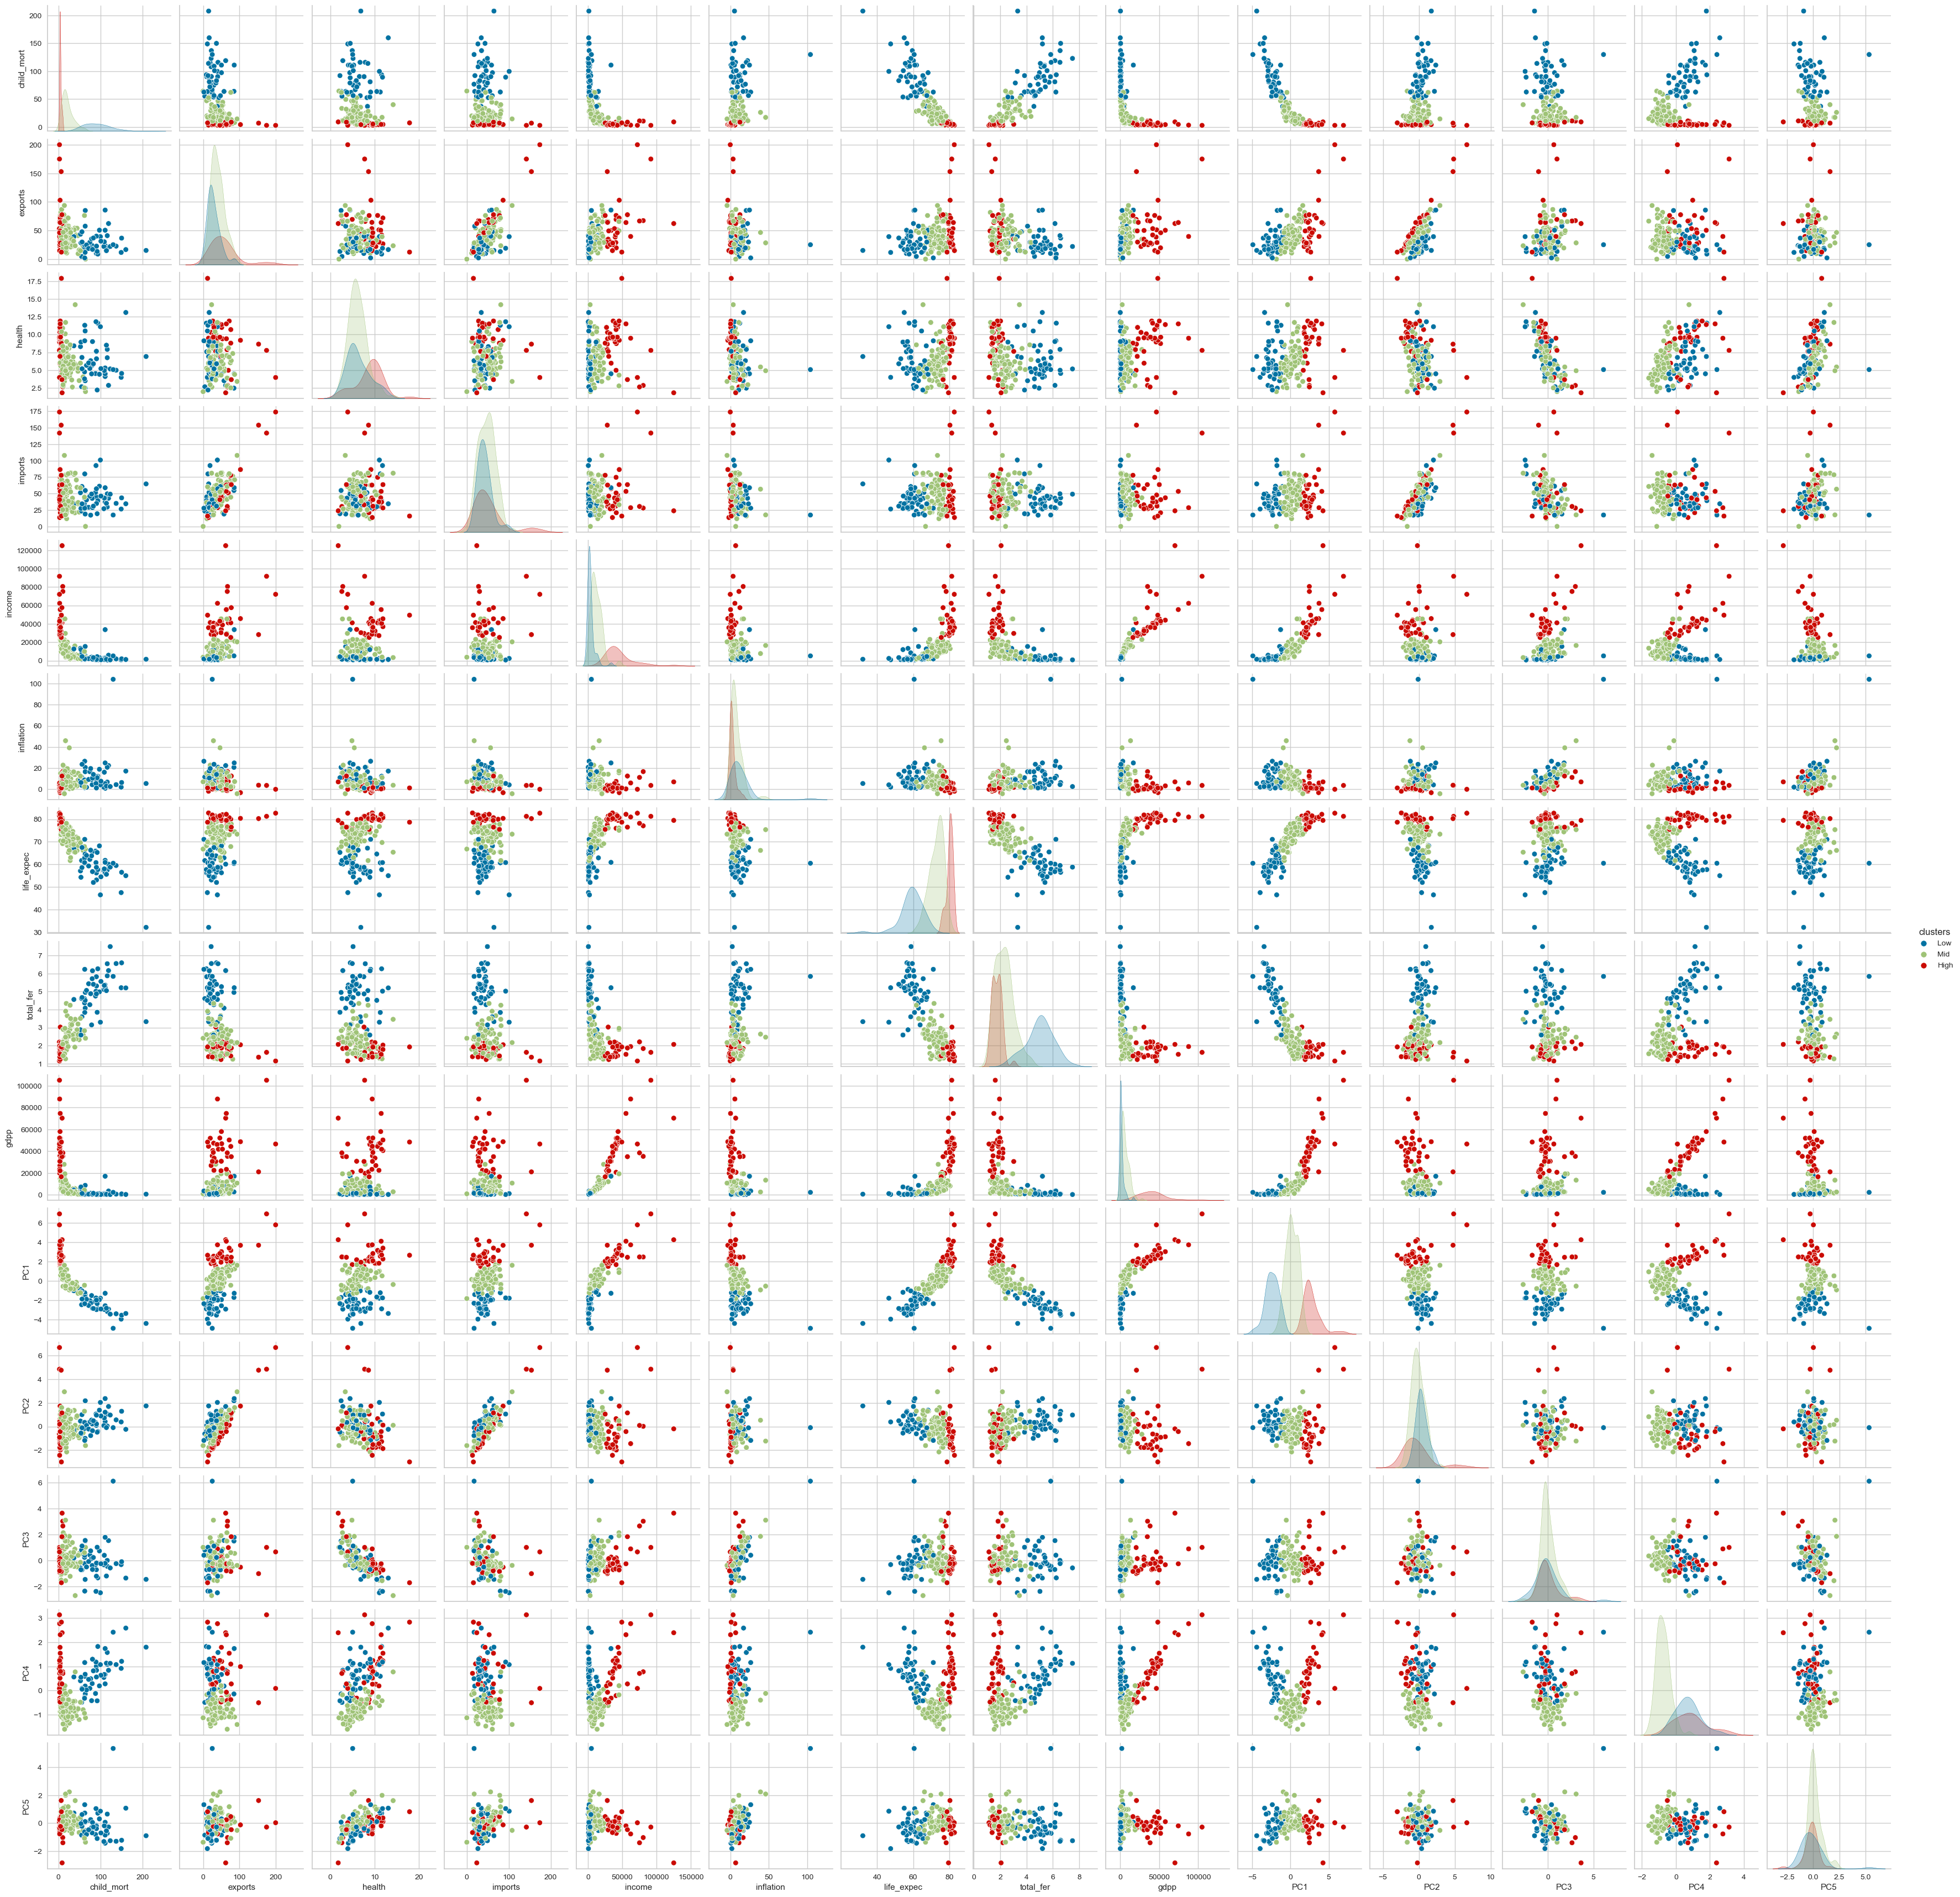

In [83]:
sns.pairplot(df, hue="clusters") 

Text(0, 0.5, 'PC4: gdpp & income influenced')

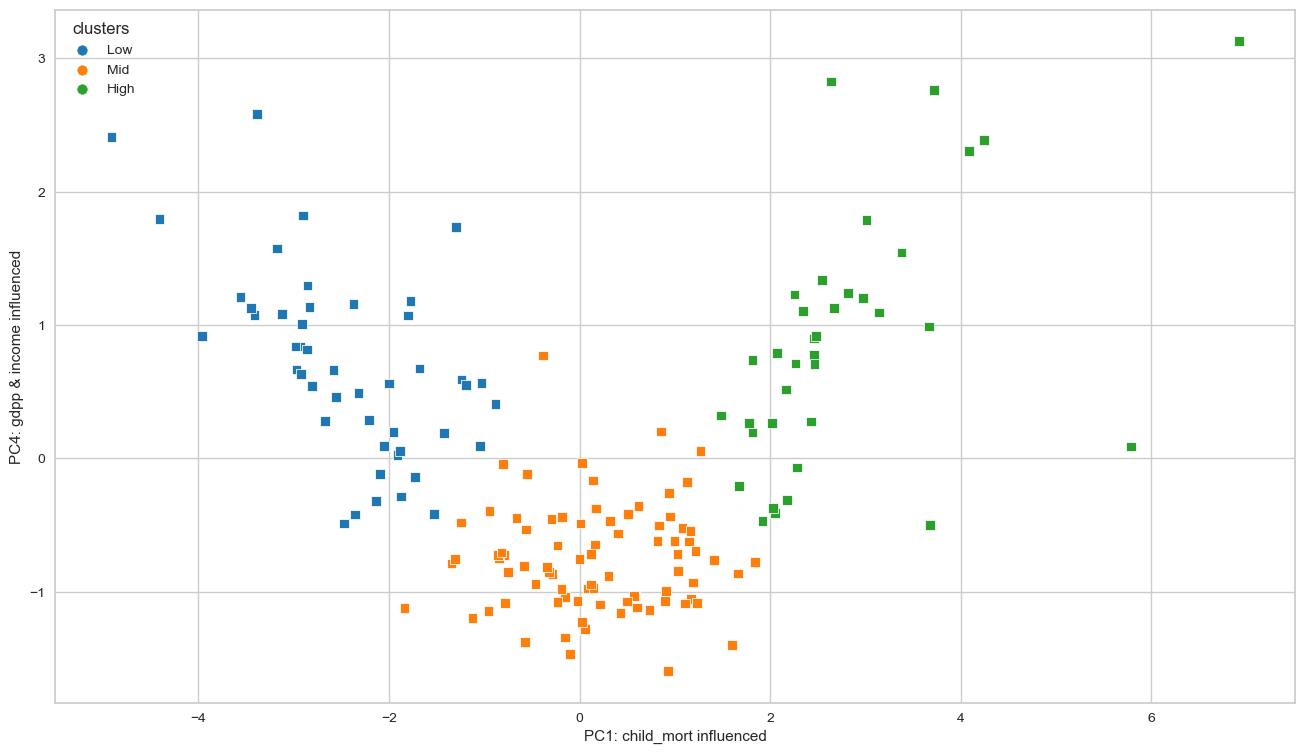

In [64]:
# plotting the PCA
plt.figure(figsize=(16,9))
ax = sns.scatterplot(data=df, x='PC1', y='PC4', hue='clusters', palette="tab10", marker="s") 
ax.set_xlabel('PC1: child_mort influenced')
ax.set_ylabel('PC4: gdpp & income influenced') 
# now we have 3 beautiful clusters 

Text(0, 0.5, 'PC2: Exports influenced')

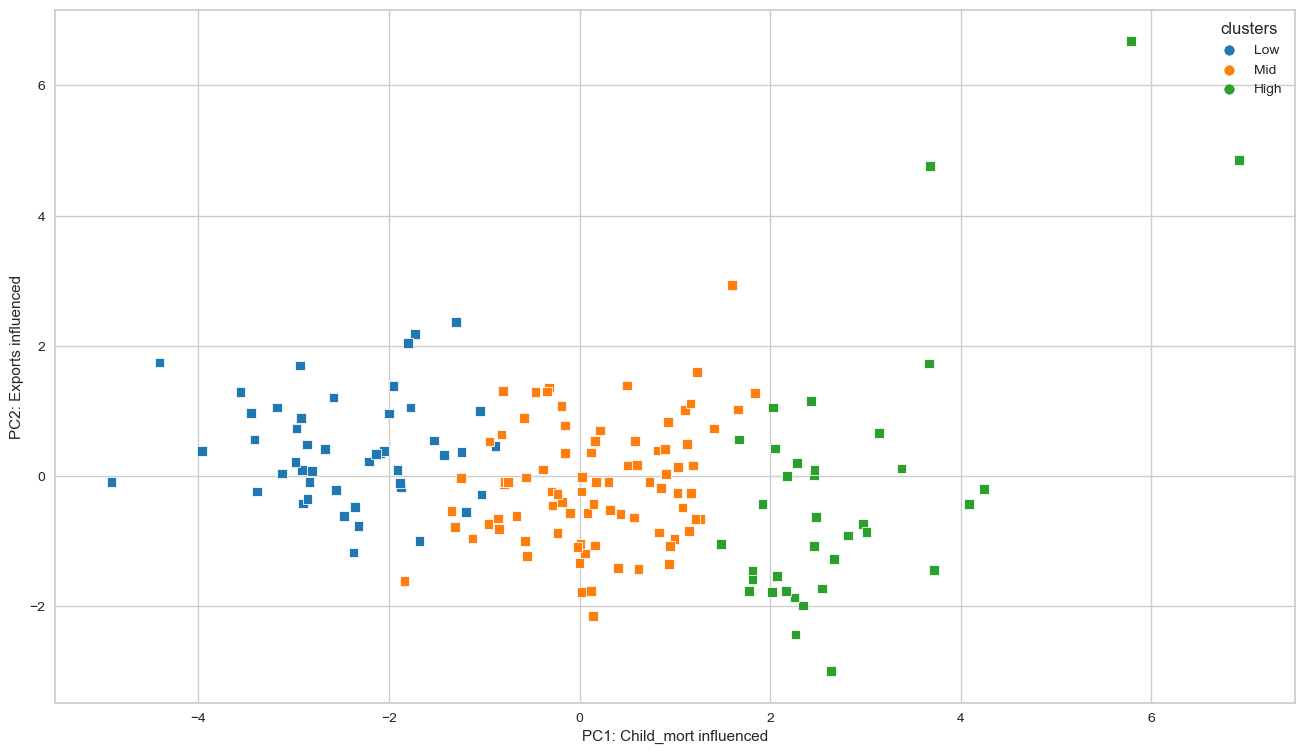

In [56]:
# plotting the PCA
plt.figure(figsize=(16,9))
ax = sns.scatterplot(data=df, x='PC1', y='PC2', 
                hue='clusters', palette="tab10", 
                marker="s")
ax.set_xlabel('PC1: Child_mort influenced')
ax.set_ylabel('PC2: Exports influenced') 

# now we have 3 beautiful clusters 

In [32]:
for idx, i in enumerate(pipe['pca'].components_):
    print(f'PC{idx+1}')
    for j in i:
        print(round(j,4), end=" ")
    print("")

PC1
-0.4195 0.2839 0.1508 0.1615 0.3984 -0.1932 0.4258 -0.4037 0.3926 
PC2
0.1929 0.6132 -0.2431 0.6718 0.0225 -0.0084 -0.2227 0.1552 -0.046 
PC3
-0.0295 0.1448 -0.5966 -0.2999 0.3015 0.6425 0.1139 0.0195 0.123 
PC4
0.3707 0.0031 0.4619 -0.0719 0.3922 0.1504 -0.2038 0.3783 0.532 
PC5
-0.169 0.0576 0.518 0.2554 -0.2471 0.7149 0.1082 -0.1353 -0.1802 


In [39]:
# this gives us the component of each PC
components = pd.DataFrame(
    data=pipe['pca'].components_, 
    columns=df.columns[1:10], 
    index=[f"PC{i}" for i in range( 1, 5 + 1 )])

components

child_mort   exports    health   imports    income  inflation  \
PC1   -0.419519  0.283897  0.150838  0.161482  0.398441  -0.193173   
PC2    0.192884  0.613163 -0.243087  0.671821  0.022536  -0.008404   
PC3   -0.029544  0.144761 -0.596632 -0.299927  0.301548   0.642520   
PC4    0.370653  0.003091  0.461897 -0.071907  0.392159   0.150442   
PC5   -0.168970  0.057616  0.518000  0.255376 -0.247150   0.714869   

     life_expec  total_fer      gdpp  
PC1    0.425839  -0.403729  0.392645  
PC2   -0.222707   0.155233 -0.046022  
PC3    0.113919   0.019549  0.122977  
PC4   -0.203797   0.378304  0.531995  
PC5    0.108220  -0.135262 -0.180167

In [42]:
print(pipe['pca'].explained_variance_ratio_.cumsum())
pipe['pca'].explained_variance_ratio_

[0.4595174  0.63133365 0.76137624 0.87190786 0.94530998]


array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211])

<AxesSubplot:xlabel='exports', ylabel='life_expec'>

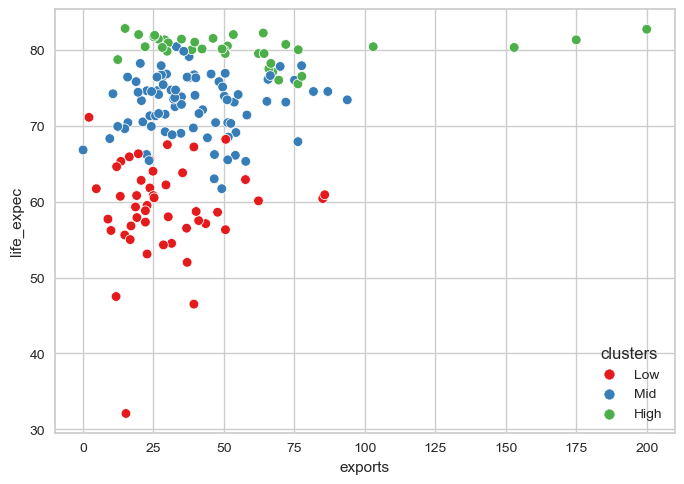

In [22]:
sns.scatterplot(data=df, x="exports", y="life_expec", hue = "clusters", palette="Set1")

In [23]:
df.columns 

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'PC1', 'PC2', 'PC3',
       'PC4', 'PC5', 'clusters'],
      dtype='object')

<AxesSubplot:xlabel='gdpp', ylabel='child_mort'>

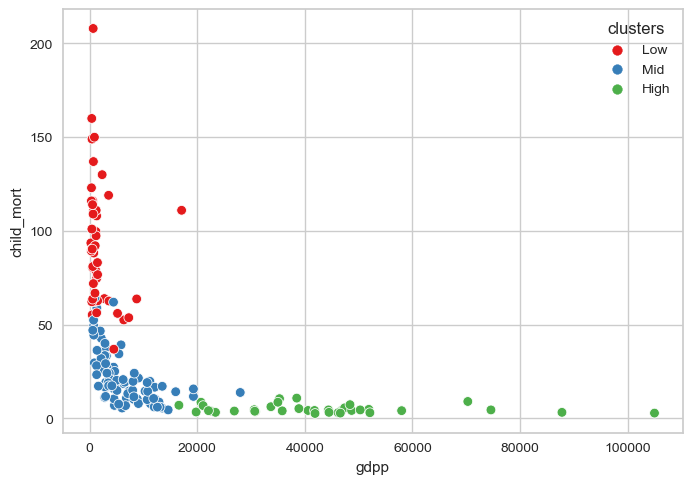

In [24]:
sns.scatterplot(data=df, x="gdpp", y="child_mort", hue = "clusters", palette="Set1")
# see how a small change in gdp (interval from 3000-7000) influence child_mort 

In [25]:
df.columns 

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'PC1', 'PC2', 'PC3',
       'PC4', 'PC5', 'clusters'],
      dtype='object')

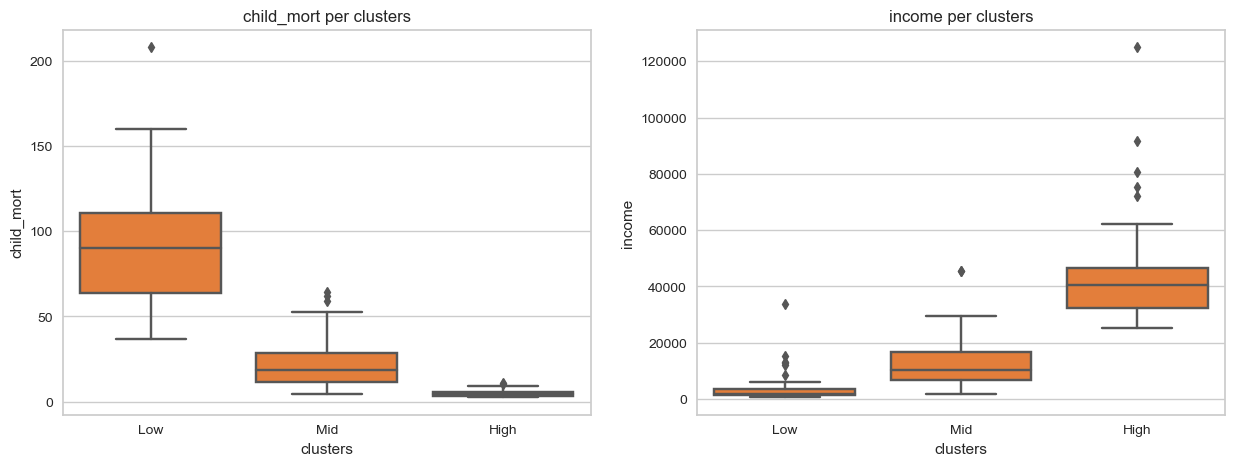

In [26]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'clusters', y = 'child_mort', data  = df, color = '#FF781F');
plt.title('child_mort per clusters')

plt.subplot(1,2,2)
sns.boxplot(x = 'clusters', y = 'income', data  = df, color = '#FF781F');
plt.title('income per clusters')

plt.show() 

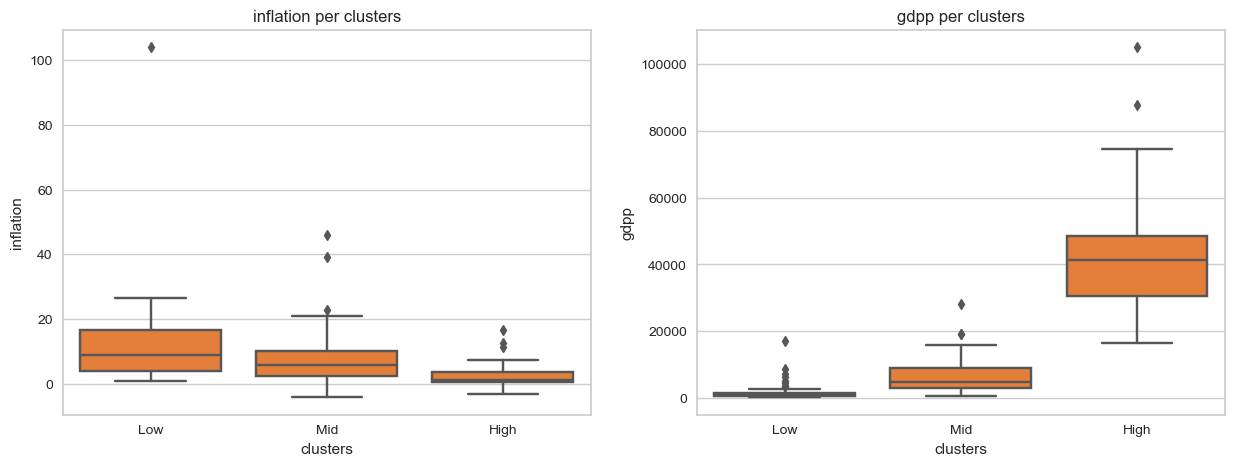

In [27]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'clusters', y = 'inflation', data  = df, color = '#FF781F');
plt.title('inflation per clusters')

plt.subplot(1,2,2)
sns.boxplot(x = 'clusters', y = 'gdpp', data  = df, color = '#FF781F');
plt.title('gdpp per clusters')

plt.show() 

Thanks for checking out the project!